In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [4]:
df.replace({
    "diagnosis":{
        "M": 0,
        "B": 1
    }
}, inplace=True)

In [5]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
X = df.drop(columns=['diagnosis', "Unnamed: 32"], axis=1)
y = df["diagnosis"]

In [7]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [9]:
print(X.shape, X_train.shape, X_test.shape)

(569, 31) (455, 31) (114, 31)


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train) # note: only fit train data 
X_test_std = scaler.transform(X_test)

### Build Neural Network 

In [11]:
# Keras & tensorflow

In [12]:
import tensorflow as tf 
tf.random.set_seed(3)
from tensorflow import keras

In [13]:
# Build input layer -> multiple hidden layer -> output layer 

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(31,)), # Input - flatten used to convert the input matrix into 1D array
    keras.layers.Dense(20, activation='relu'), # hidden - 20 neurons 
    keras.layers.Dense(2, activation='sigmoid') # Output - 2 binary classification
])

In [14]:
# compiling the neural network 

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
# Training the nn (Much Improvements with standardized data)

history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 [==============================] - 1s 23ms/step - loss: 0.8416 - accuracy: 0.4377 - val_loss: 0.7153 - val_accuracy: 0.5870
Epoch 2/10
13/13 [==============================] - 0s 4ms/step - loss: 0.5335 - accuracy: 0.7897 - val_loss: 0.4616 - val_accuracy: 0.8043
Epoch 3/10
13/13 [==============================] - 0s 4ms/step - loss: 0.3705 - accuracy: 0.8924 - val_loss: 0.3310 - val_accuracy: 0.8913
Epoch 4/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2862 - accuracy: 0.9267 - val_loss: 0.2616 - val_accuracy: 0.9348
Epoch 5/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2344 - accuracy: 0.9487 - val_loss: 0.2222 - val_accuracy: 0.9348
Epoch 6/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2014 - accuracy: 0.9535 - val_loss: 0.1967 - val_accuracy: 0.9565
Epoch 7/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1770 - accuracy: 0.9584 - val_loss: 0.1785 - val_accuracy: 0.9565
Epoch 8/10
13/13 [=

In [16]:
# From the training, as the loss decreases, the accuracy increases 

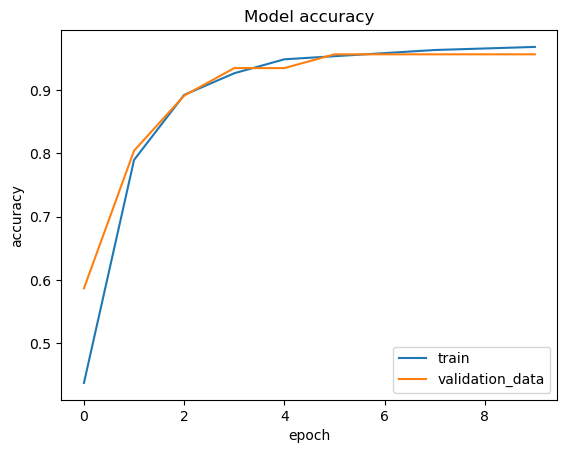

In [17]:
# visualizing accuracy and the loss

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['train', 'validation_data'], loc='lower right')

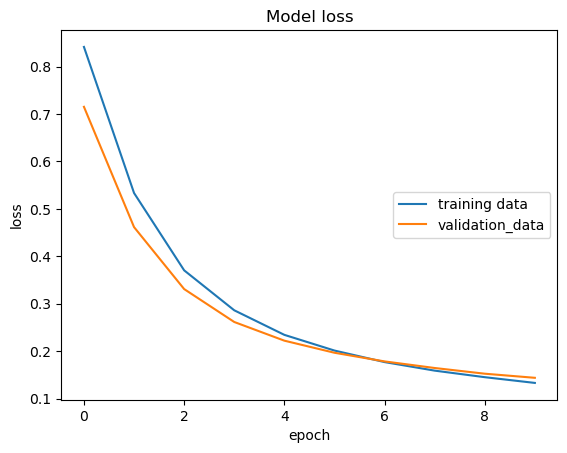

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation_data'], loc='right')

In [ ]:
# Acurracy of the model on test data 

In [20]:
loss, acccuracy = model.evaluate(X_test_std, Y_test)
print(acccuracy)

4/4 [==============================] - 0s 2ms/step - loss: 0.1219 - accuracy: 0.9737
0.9736841917037964


In [21]:
print(X_test_std.shape)
print(X_test_std[0])

(114, 31)
[-0.23949961 -0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457
 -0.11323672  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124
  2.62763999  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593
  2.88971815 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552
 -0.38767294  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515
 -0.6268286 ]


In [22]:
y_pred = model.predict(X_test_std)


# NN prediction gives the probability of the target labels, 
# model.predict() gives the probability of each class for that data point 

4/4 [==============================] - 0s 2ms/step


In [24]:
print(y_pred.shape)
print(y_pred[0])


(114, 2)
[0.30205014 0.705479  ]


In [ ]:
# In the above case, it is 30% sure its 0-malignate & 70% sure its 1-Benign, it doesnt have 
# to amount to 100% 

In [ ]:
# CONVERTING THE PREDICTION PROBABILITY TO CLASS LABELS, using argmax function, 
# from the above example, the prediction will be 1 because 70% is higher than 30% 

In [ ]:
# np.argmax([]) returns the index of the maximum value in an array 

In [25]:
y_pred_labels = [np.argmax(array) for array in y_pred]

print(y_pred_labels)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


In [ ]:
# Build a predictive system 

In [29]:
input_data = (-0.23949961, -0.04462793, -1.41612656, -0.05903514, -0.16234067,  2.0202457,
 -0.11323672,  0.18500609,  0.47102419,  0.63336386,  0.26335737,  0.53209124,
  2.62763999,  0.62351167,  0.11405261,  1.01246781,  0.41126289,  0.63848593,
  2.88971815, -0.41675911,  0.74270853, -0.32983699, -1.67435595, -0.36854552,
 -0.38767294,  0.32655007, -0.74858917, -0.54689089, -0.18278004, -1.23064515,
 -0.6268286)

input_data = np.asarray(input_data)

input_data = input_data.reshape(1, -1)

# Standardized
# input_data = scaler.transform(input_data)

prediction = model.predict(input_data)

print(prediction)

prediction_label  =  [np.argmax(prediction)]

print(prediction_label)

1/1 [==============================] - 0s 24ms/step
[[0.3020501 0.705479 ]]
[1]
